In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [3]:
train = datasets.FashionMNIST('~/pytorch/F_MNIST_data', 
                              train = True, 
                              download = True, 
                              transform=transform)

test = datasets.FashionMNIST('~/pytorch/F_MNIST_data',
                            train = False,
                            download = True,
                            transform = transform)

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

In [5]:
from torch import optim, nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import torch.nn.functional as F

In [7]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = F.log_softmax(self.output(x), dim = 1)
        
        return x

In [8]:
model = Model()

In [9]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [10]:
epochs = 10

for epoch in range(epochs):
    train_loss = 0
    for images, labels in trainset:
        logits = model.forward(images)
        loss = criterion(logits, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    print(f'Training loss: {train_loss/ len(trainset)} ')

Training loss: 0.5150365045329909 
Training loss: 0.3899355641623804 
Training loss: 0.3539149039732749 
Training loss: 0.3305769878139755 
Training loss: 0.31320831656996123 
Training loss: 0.30431586213266926 
Training loss: 0.2894316797952916 
Training loss: 0.2816225949889307 
Training loss: 0.2747618791375206 
Training loss: 0.2678845302700234 


In [11]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
import helper

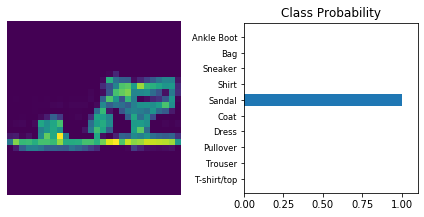

In [12]:
images, labels = next(iter(testset))

img = images[1]

ps = torch.exp(model(img))
helper.view_classify(img, ps, version = 'Fashion')

### Classifier with DROPOUT and ACCURACY

In [13]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.h1 = nn.Linear(784, 256)
        self.h2 = nn.Linear(256, 128)
        self.h3 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout()
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.h1(x)))
        x = self.dropout(F.relu(self.h2(x)))
        x = self.dropout(F.relu(self.h3(x)))
        x = F.log_softmax(self.output(x), dim = 1)
        
        return x

In [14]:
clf = Classifier()
optimizer = optim.Adam(clf.parameters(), lr = 0.003)
criterion = nn.NLLLoss()

In [ ]:
epochs = 30
training_loss, test_loss = [], []

for epoch in range(epochs):
    r_loss, r_accuracy = 0, 0
    for images, labels in trainset:
        output = clf.forward(images)
        loss = criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        r_loss += loss.item()
        
        ps = torch.exp(output)
        r_top_p, r_top_class = ps.topk(1, dim = 1)
        r_equals = r_top_class == labels.view(*r_top_class.shape)
        r_accuracy += torch.mean(r_equals.type(torch.FloatTensor))
        
    t_loss, t_accuracy = 0, 0   
    with torch.no_grad():
        clf.eval()
        for images, labels in testset:
            log_ps = clf.forward(images)
            t_loss += criterion(log_ps, labels)
            
            ps = torch.exp(log_ps)
            t_top_p, t_top_class = ps.topk(1, dim = 1)
            t_equals = t_top_class == labels.view(*t_top_class.shape)
            t_accuracy += torch.mean(t_equals.type(torch.FloatTensor))
            
    clf.train()
    training_loss.append(r_loss)
    test_loss.append(t_loss)
    
    print('Epochs {}/{}..'.format(epoch+1, epochs),
         'Training loss: {:.3f}..'.format(r_loss/len(trainset)),
          'Training acc: {:.3f}..'.format(r_accuracy/len(trainset)),
         'Test loss: {:.3f}..'.format(t_loss/len(testset)),
         'Test acc: {:3f}..'.format(t_accuracy/len(testset)))

Epochs 1/30.. Training loss: 0.676.. Training acc: 0.767.. Test loss: 0.503.. Test acc: 0.815386..
Epochs 2/30.. Training loss: 0.652.. Training acc: 0.775.. Test loss: 0.502.. Test acc: 0.823945..
Epochs 3/30.. Training loss: 0.655.. Training acc: 0.777.. Test loss: 0.490.. Test acc: 0.822552..
Epochs 4/30.. Training loss: 0.630.. Training acc: 0.785.. Test loss: 0.482.. Test acc: 0.831907..
